In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit # The module that contains the curve_fit routine

import warnings
warnings.filterwarnings("ignore")

# Import own libraries 
import os, sys
script_path = os.path.realpath(os.path.dirname("10_on_trajectories"))
os.chdir(script_path)
sys.path.append("..")

from myLibraries.queries import * 
from myLibraries.rawData_queries import *
from myLibraries.events import *
from myLibraries.theoretical_functions import *

In [4]:
def draw(title, x_lab, y_lab, f_lab, x, y):
    
    plt.figure(figsize=(15, 5), dpi=80)
    plt.title(title)
    plt.xlabel(x_lab)
    plt.ylabel(y_lab)
    
    for i in range(len(x)):
        plt.plot(x[i], y[i], label=f_lab[i])
        
    plt.xticks(rotation=90)
    plt.legend(loc='best')

    plt.show()

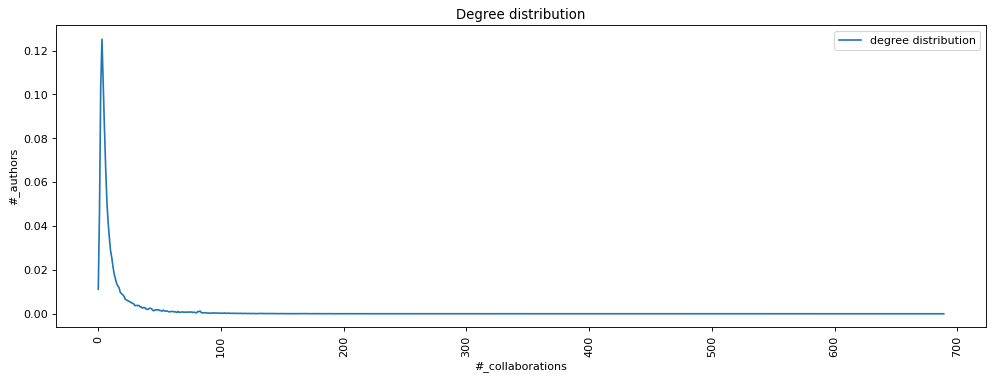

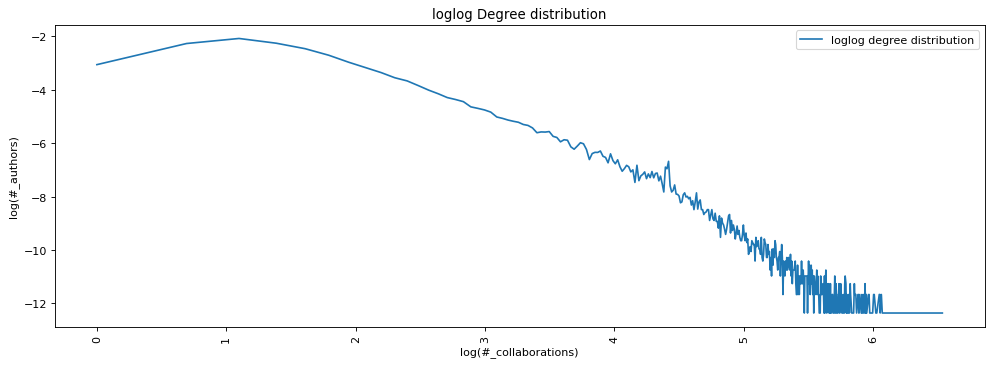

In [51]:
# DD
colls = get_all_collabs()["2018"].values

unique, counts = np.unique(colls, return_counts=True)
x, y = unique, counts  
y = [a / sum(y) for a in y] # normalization

draw("Degree distribution", "#_collaborations", "#_authors", ["degree distribution"], [x], [y])
draw("loglog Degree distribution",  "log(#_collaborations)", "log(#_authors)", ["loglog degree distribution"], [np.log(x)], [np.log(y)])

In [48]:
# Broken powerlaw fit
x,y = unique[3:], counts[3:]
y = [a / sum(y) for a in y] # normalization

xcs, c1s, c2s, a1s, a2s, errs = x, [], [], [], [], []

for xc in xcs:
        dd, c1, c2, a1, a2, xc = xc_fit_broken_powerlaw(x,y, xc)

        err = sum([pow(abs(dd[i] - y[i]),2) for i in range(len(x))])
        
        c1s.append(c1)
        c2s.append(c2)
        a1s.append(a1)
        a2s.append(a2)
        errs.append(err)
        # draw("broken powerlaw fit", "#_collaborations", "#_authors", ['real', 'fit'], [x, x], [y, dd])
        # draw("loglog broken powerlaw fit", "log(#_collaborations)", "log(#_authors)", ['real', 'fit'], [np.log(x), np.log(x)], [np.log(y), np.log(dd)])

results = pd.DataFrame({"xc": xcs, "c1": c1s, "c2": c2s, "a1": a1s, "a2": a2s, "err": errs})
results


,xc,c1,c2,a1,a2,err
0,3,136.105778,2.017191e-57,124.432125,1.131960,0.068015
1,4,0.218203,1.149067e+00,0.345011,1.543371,0.000344
2,5,0.314322,1.585060e+00,0.673797,1.679091,0.000067
3,6,0.388495,2.058272e+00,0.851126,1.781686,0.000101
4,7,0.444859,2.575496e+00,0.960333,1.862759,0.000218
...,...,...,...,...,...,...
377,603,0.753291,4.391563e+254,1.358670,92.990533,0.001511
378,623,0.753294,1.819676e+268,1.358672,97.398815,0.001511
379,643,0.753290,4.097624e+202,1.358669,73.552522,0.001511
380,669,0.753293,2.421879e+289,1.358671,103.823636,0.001511


xc     8.000000
c1     0.485818
c2     3.217003
a1     1.029941
a2     1.939017
err    0.000326
Name: 5, dtype: float64


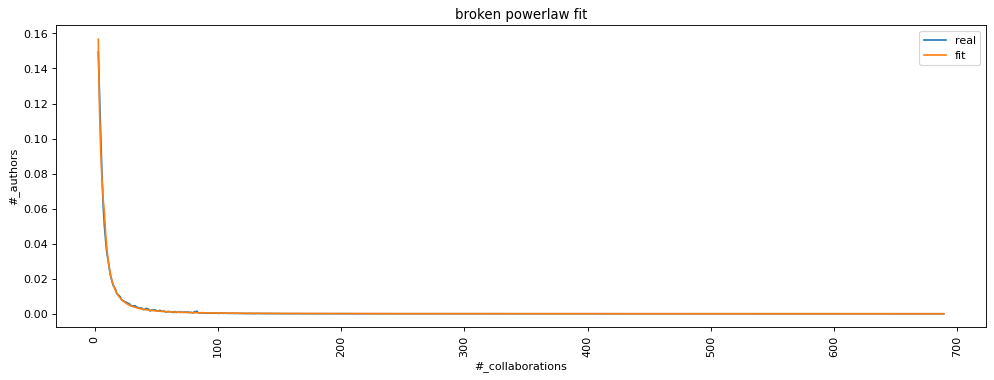

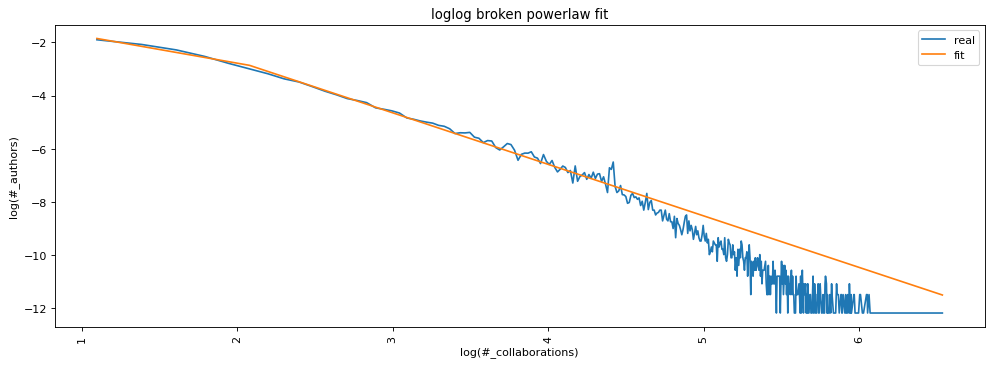

In [50]:
# sorted my err
best = results.sort_values(by="err",  ascending=True).loc[5]
xc = best["xc"]
c1 = best["c1"]
a1 = best["a1"]
a2 = best["a2"]

dd = broken_powerlaw(x, c1, a1, a2, xc)

print(best)
draw("broken powerlaw fit", "#_collaborations", "#_authors", ['real', 'fit'], [x, x], [y, dd])
draw("loglog broken powerlaw fit", "log(#_collaborations)", "log(#_authors)", ['real', 'fit'], [np.log(x), np.log(x)], [np.log(y), np.log(dd)])
